In [1]:
# Load some packages (if you get an error, you need to install the package in the terminal)\n
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg as lg
import time
import seaborn as sns

In [2]:
#Simple random walk function
def SRW_Closed(L,p):
    q = 1 - p
    t = 0
    tmax = 100
    sum_x = 1 #initial starting place
    y_0 = 0
    time_plot=[t]
    Y = [y_0]
    %matplotlib notebook

    start_time = time.time()

    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(111)

    plt.ion
    plt.title('Simple Random Walk')

    fig.show()
    fig.canvas.draw()

    while t <tmax:
        r = np.random.rand()
        if sum_x == L:
            if r<p:
                x = 0
            else:
                x = -1
        elif sum_x == 0:
            if r<p:
                x = 1
            else:
                x = 0
        elif r<p:
            x = 1
        else:
            x = -1
        sum_x = sum_x + x

        ax.clear()
        ax.plot(time_plot, Y)
        t +=1
        Y.append(sum_x)
        time_plot.append(t)
        fig.canvas.draw()
        plt.xlabel('Time')
        plt.ylabel('state')
        plt.tight_layout()

    print("--- %s seconds ---" % (time.time() - start_time))

<IPython.core.display.Javascript object>


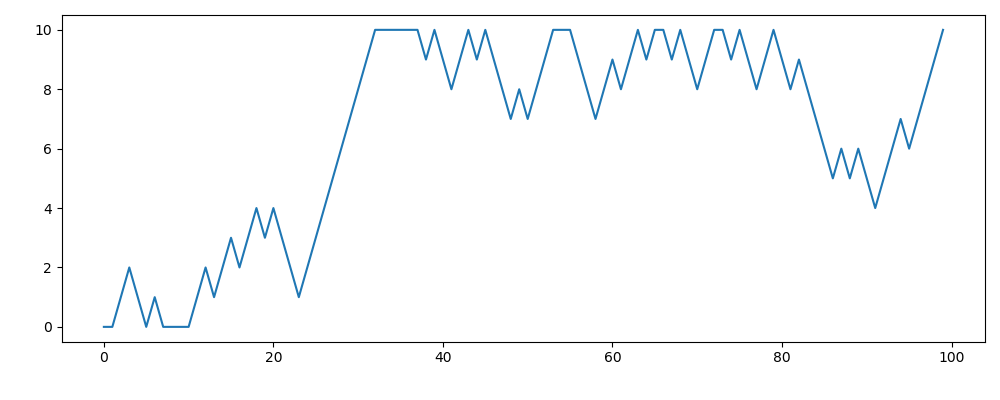

--- 7.769665956497192 seconds ---


In [3]:
SRW_Closed(10,.65)

In [4]:
def SRW_CBC1(p, L, tmax, N):
    X = np.random.rand(N,tmax)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros((N,tmax))
#    for j in range(0,tmax):
    for i in range(0, N):
        X[i,:] = 1 #start at zero
#        Y[i,:] = np.cumsum(X[i,:])
        for j in range(1,tmax):
#        for i in range(0, N):
#            X[i,0] = 1 #start at zero
            if Y[i,j-1] == L:
                X[i,j] = -1
                Y[i,j] = Y[i,j-1]+X[i,j]
            elif Y[i,j-1] == 1:
                X[i,j] = 1
                Y[i,j] = Y[i,j-1]+X[i,j]
            else:
                Y[i,j] = Y[i,j-1]+X[i,j]
                continue
    return Y

In [5]:
def SRW_CBC3(p, L, N, tmax):
    X = np.zeros((N,tmax))
    Y = np.zeros((N,tmax))
    for i in range(0,N):
        X[i,0] = 1 #Initial Starting Point
        Y[i,0] = 1
        for j in range(1,tmax):
            r = np.random.rand()
            if Y[i,j-1] == 1:
                if r<p:
                    X[i,j] = 1
                else:
                    X[i,j] = 0
            elif Y[i,j-1] == L:
                if r<p:
                    X[i,j] = 0
                else:
                    X[i,j] = -1
            elif r<p:
                X[i,j] = 1
            else:
                X[i,j] = -1
            Y[i,j] = Y[i,j-1]+X[i,j]
    return Y
#     plt.figure(figsize = (10,4))
#     plt.subplot(1,2,1)
#     plt.hist(Y[0:49],density=True)
#     # sns.distplot(SS[1][:,9],bins = 15, kde = False)
#     plt.title('Empirical Distribution at time step n = 50')
#     #plt.yticks(range(0,1))

#     plt.subplot(1,2,2)
#     plt.title('Empirical Distribution at time step n = 500')
#     # sns.distplot(SS[1][:,99],bins = len(np.unique(SS[1][:,99])))
#     plt.hist(Y[0:499],density=True)  

In [6]:
Y = SRW_CBC3(.7,10,5,5)
print(Y)

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.hist(Y[:,2])

[[1. 2. 3. 4. 5.]
 [1. 1. 1. 1. 2.]
 [1. 1. 2. 3. 4.]
 [1. 2. 3. 2. 3.]
 [1. 2. 3. 4. 5.]]


<IPython.core.display.Javascript object>

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 3.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

<IPython.core.display.Javascript object>


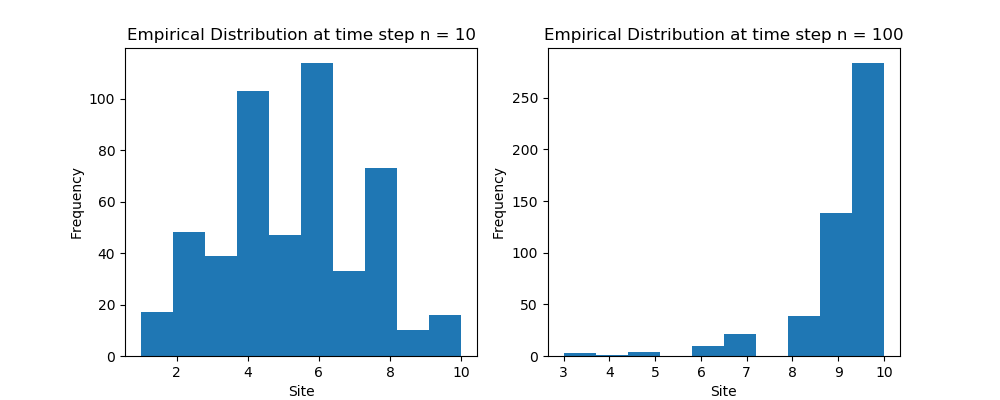

Text(0, 0.5, 'Frequency')

In [19]:
Y = SRW_CBC3(.7,10,500,100)

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.hist(Y[:,9])
plt.xlabel('Site')
plt.ylabel('Frequency')
# sns.distplot(SS[1][:,9],bins = 15, kde = False)
plt.title('Empirical Distribution at time step n = 10')
#plt.yticks(range(0,1))

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 100')
#sns.distplot(bins = len(np.unique(Y[:,99])))
plt.hist(Y[:,99]) 
plt.xlabel('Site')
plt.ylabel('Frequency')

In [8]:
SRW_CBC3(.05,10,500)
print(Y[68,:])
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.hist(Y[:,9],density=True)
sns.distplot(Y[:,9],bins = 10, kde = False)
plt.title('Empirical Distribution at time step n = 10')

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 100')
sns.distplot(Y[:,99],bins = 10)#len(np.unique(Y[:,99])))
plt.hist(Y[:,99],density=True)      
#    plt.tight(layout)
#    plt.savefig('ofnasd.pdf')

TypeError: SRW_CBC3() missing 1 required positional argument: 'tmax'

In [24]:
def SRW_CBC2(p, L):
    tmax = 500
    X = np.zeros(tmax)
    Y = np.zeros(tmax)
    X[0] = 1 #start at zero
    for i in range(1,tmax):
        r = np.random.rand()
        if Y[i-1] == L:
            if r<p:
                X[i] = 0
            else:
                X[i] = -1
            Y[i] = Y[i-1]+X[i]
        elif Y[i-1] == 1:
            if r<p:
                X[i] = 1
            else:
                X[i] = 0
            X[i] = 1
            Y[i] = Y[i-1]+X[i]
        else:
            if r<p:
                X[i] = 1
            else:
                X[i] = -1
            Y[i] = Y[i-1]+X[i]
            continue
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.hist(Y[0:49],density=True)
    # sns.distplot(SS[1][:,9],bins = 15, kde = False)
    plt.title('Empirical Distribution at time step n = 50')
    plt.xlabel('Site')
    plt.ylabel('Frequency')
    #plt.yticks(range(0,1))

    plt.subplot(1,2,2)
    plt.title('Empirical Distribution at time step n = 500')
    # sns.distplot(SS[1][:,99],bins = len(np.unique(SS[1][:,99])))
    plt.hist(Y[0:499],density=True)  
    plt.xlabel('Site')
    plt.ylabel('Frequency')

<IPython.core.display.Javascript object>


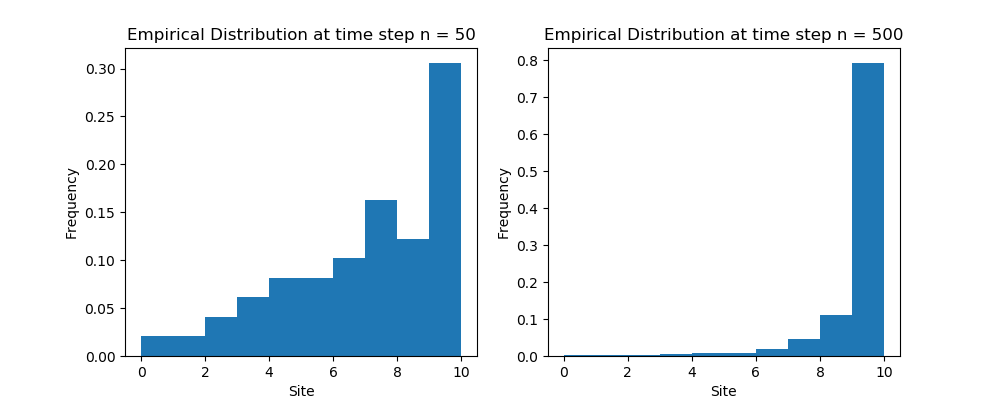

In [33]:
SRW_CBC2(.7,10)

In [ ]:
k = 5
X0 = np.ones(k)
T = 10
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    r = np.random.randint(0,len(current_state)-1) # random is inclusive [a,b] but remember python indexes from 0 to k-1
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)

In [34]:
def data1(T,gamma):
    k = 500
    X0 = np.ones(k)
    fitness = np.ones(k)
    XN = np.ones((T, k))

#    current_state = []
#    current_state.extend(range(k))
    current_state = X0
    for j in range(1,T):
        numerator = fitness*current_state**gamma
        denominator = sum(numerator)
        selection_prob = numerator/denominator
        r = np.random.choice(k, p = selection_prob) #non uniform random choice from range(len(current))
#        newBall = current_state[r]
#        XN[j:,newBall] = XN[j-1,newBall]+1
#        current_state.append(newBall)
        XN[j,] = XN[j-1,]
        XN[j,r-1] = XN[j-1,r-1]+1
        current_state = XN[j,]
    XN.sort(axis =1) #try without this
    return XN[T-1,:]
    

In [35]:
def one_cdf(data_t):

    data_size=len(data_t)

    # Set bins edges
    data_set=sorted(set(data_t))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data_t, bins=bins, density=False)

    counts=counts.astype(float) #/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    return bin_edges[0:-1], np.ones(len(cdf))-cdf

In [36]:
from statsmodels.distributions.empirical_distribution import ECDF

In [38]:
ecdf_XN11 = ECDF(data1(5000,0))
#bins11, tail11 = one_cdf(data1(5000,0))
ecdf_XN12 = ECDF(data1(20000,0))
#bins12, tail12 = one_cdf(data1(20000,0))
ecdf_XN13 = ECDF(data1(80000,0))
#bins13, tail13 = one_cdf(data1(80000,0))
k = 500
# Norm11 = ecdf_XN11/(k+5000)
# Norm12 = ecdf_XN12/(k+20000)
# Norm13 = ecdf_XN13/(k+80000)

<IPython.core.display.Javascript object>


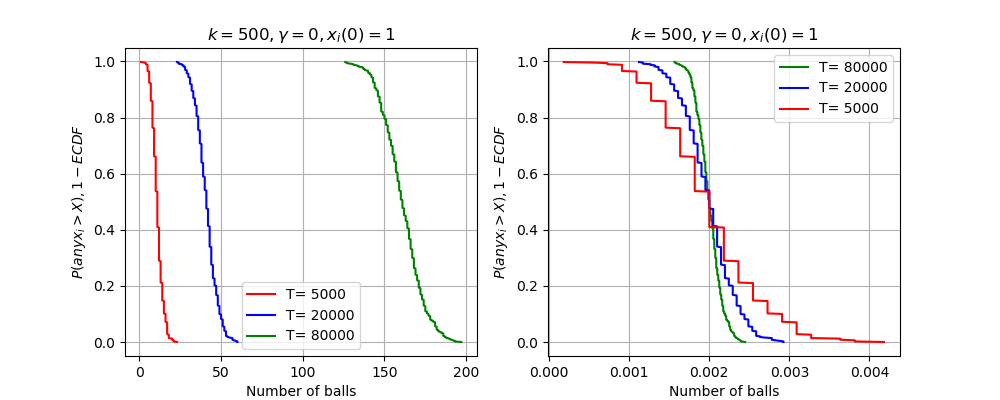

In [52]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
#plt.plot(bins11, tail11,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XN11.x, np.ones(len(ecdf_XN11.y))-ecdf_XN11.y,ms = 4, color='r',label = 'T= 5000')
#plt.plot(bins12, tail12,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 20000')
plt.plot(ecdf_XN12.x, np.ones(len(ecdf_XN12.y))-ecdf_XN12.y,ms = 4, color='b',label = 'T= 20000')
#plt.plot(bins13, tail13,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 80000')
plt.plot(ecdf_XN13.x, np.ones(len(ecdf_XN13.y))-ecdf_XN13.y,ms = 4, color='g',label = 'T= 80000')

k = 500
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$')
plt.title(r'$k = {}, γ = 0, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot((1/(k+80000))*ecdf_XN13.x,(np.ones(len(ecdf_XN13.y))-ecdf_XN13.y), ms = 4, color='g',label = 'T= 80000')
plt.plot((1/(k+20000))*ecdf_XN12.x, np.ones(len(ecdf_XN12.y))-ecdf_XN12.y, ms = 4, color='b',label = 'T= 20000')
plt.plot((1/(k+5000))*ecdf_XN11.x, np.ones(len(ecdf_XN11.y))-ecdf_XN11.y, ms = 4, color='r',label = 'T= 5000')

#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$')
plt.title(r'$k = {}, γ = 0, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls')
plt.grid(True)

In [45]:
ecdf_XN21 = ECDF(data1(5000,0.5))
#bins21, tail21 = one_cdf(data1(5000,0.5))
ecdf_XN22 = ECDF(data1(20000,0.5))
#bins22, tail22 = one_cdf(data1(20000,0.5))
ecdf_XN23 = ECDF(data1(80000,0.5))
#bins23, tail23 = one_cdf(data1(80000,0.5))

<IPython.core.display.Javascript object>


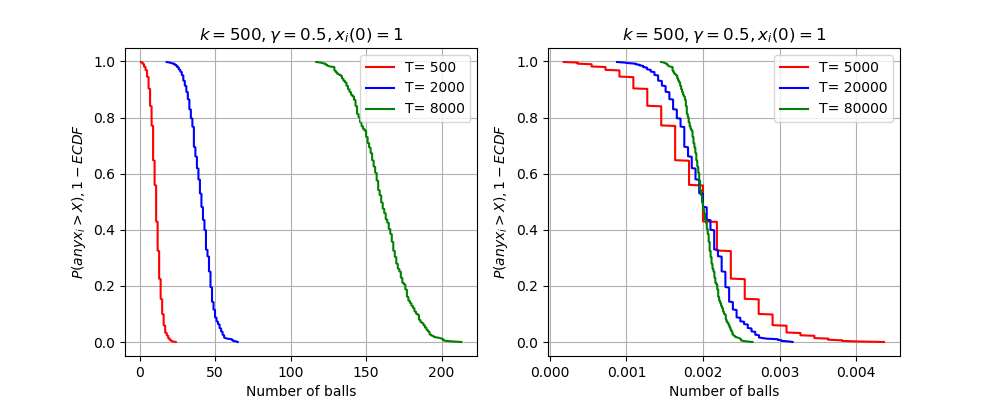

In [56]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
#plt.plot(bins21, tail21,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XN21.x, np.ones(len(ecdf_XN21.y))-ecdf_XN21.y,ms = 4, color='r',label = 'T= 500')
#plt.plot(bins22, tail22,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 20000')
plt.plot(ecdf_XN22.x, np.ones(len(ecdf_XN22.y))-ecdf_XN22.y,ms = 4, color='b',label = 'T= 2000')
#plt.plot(bins23, tail23,linestyle='--', marker="o",ms = 4, color='r',label = 'T= 80000')
plt.plot(ecdf_XN23.x, np.ones(len(ecdf_XN23.y))-ecdf_XN23.y,ms = 4, color='g',label = 'T= 8000')

k = 500
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$')
plt.title(r'$k = {}, γ = 0.5, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot((1/(k+5000))*ecdf_XN21.x, np.ones(len(ecdf_XN21.y))-ecdf_XN21.y, ms = 4, color='r',label = 'T= 5000')
plt.plot((1/(k+20000))*ecdf_XN22.x, np.ones(len(ecdf_XN22.y))-ecdf_XN22.y, ms = 4, color='b',label = 'T= 20000')
plt.plot((1/(k+80000))*ecdf_XN23.x,(np.ones(len(ecdf_XN23.y))-ecdf_XN23.y), ms = 4, color='g',label = 'T= 80000')

#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$')
plt.title(r'$k = {}, γ = 0.5, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls')
plt.grid(True)

In [57]:
ecdf_XN31 = ECDF(data1(5000,1))
#bins31, tail31 = one_cdf(data1(5000,1))
ecdf_XN32 = ECDF(data1(20000,1))
#bins32, tail32 = one_cdf(data1(20000,1))
ecdf_XN33 = ECDF(data1(80000,1))
#bins33, tail33 = one_cdf(data1(80000,1))

<IPython.core.display.Javascript object>


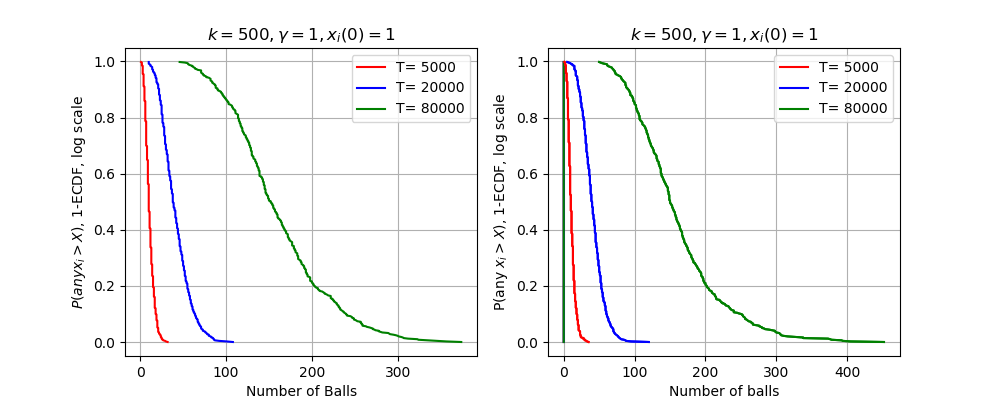

In [85]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
#plt.plot(bins31, tail31,linestyle='--',ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XN31.x, np.ones(len(ecdf_XN31.y))-ecdf_XN31.y, linestyle='-',ms = 4, color='r',label = 'T= 5000')
#plt.plot(bins32, tail32,linestyle='--',ms = 4, color='b',label = 'T= 20000')
plt.plot(ecdf_XN32.x, np.ones(len(ecdf_XN32.y))-ecdf_XN32.y, linestyle='-',ms = 4, color='b',label = 'T= 20000')
#plt.plot(bins33, tail33,linestyle='--',ms = 4, color='g',label = 'T= 80000')
plt.plot(ecdf_XN33.x, np.ones(len(ecdf_XN33.y))-ecdf_XN33.y, linestyle='-',ms = 4, color='g',label = 'T= 80000')

k = 500
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X)$, 1-ECDF, log scale')
plt.title(r'$k = {}, γ = 1, x_i(0) = 1$'.format(k))
plt.xlabel('Number of Balls')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot((1/(k+5000))*ecdf_XN31.x, np.ones(len(ecdf_XN31.y))-ecdf_XN31.y, ms = 4, color='r',label = 'T= 5000')
plt.plot((1/(k+20000))*ecdf_XN32.x, np.ones(len(ecdf_XN32.y))-ecdf_XN32.y, ms = 4, color='b',label = 'T= 20000')
plt.plot((1/(k+80000))*ecdf_XN33.x,(np.ones(len(ecdf_XN33.y))-ecdf_XN33.y), ms = 4, color='g',label = 'T= 80000')

#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'P(any $x_i > X$), 1-ECDF, log scale')
plt.title(r'$k = {}, γ = 1, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls')
plt.grid(True)

In [59]:
ecdf_XN41 = ECDF(data1(5000,1.5))
#bins41, tail41 = one_cdf(data1(5000,1.5))
ecdf_XN42 = ECDF(data1(20000,1.5))
#bins42, tail42 = one_cdf(data1(20000,1.5))
ecdf_XN43 = ECDF(data1(80000,1.5))
#bins43, tail43 = one_cdf(data1(80000,1.5))

<IPython.core.display.Javascript object>


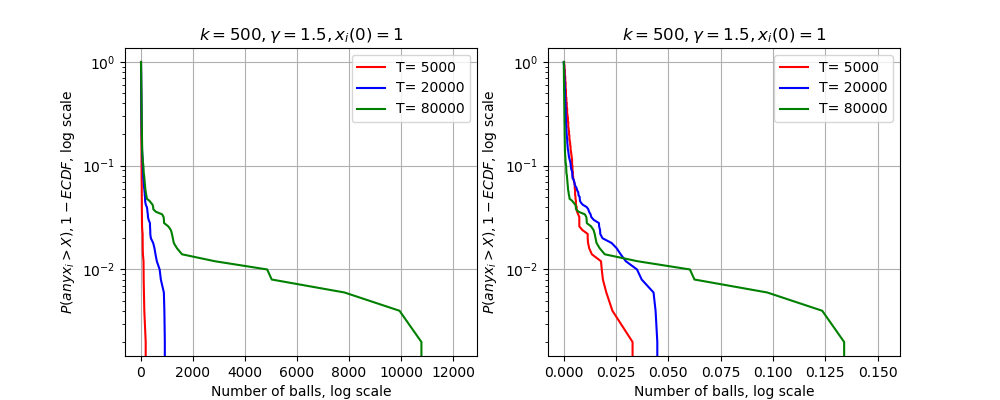

In [83]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
#plt.plot(bins41, tail41,linestyle='--',ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XN41.x, np.ones(len(ecdf_XN41.y))-ecdf_XN41.y,ms = 4, color='r',label = 'T= 5000')
#plt.plot(bins42, tail42,linestyle='--',ms = 4, color='b',label = 'T= 20000')
plt.plot(ecdf_XN42.x, np.ones(len(ecdf_XN42.y))-ecdf_XN42.y,ms = 4, color='b',label = 'T= 20000')
#plt.plot(bins43, tail43,linestyle='--',ms = 4, color='g',label = 'T= 80000')
plt.plot(ecdf_XN43.x, np.ones(len(ecdf_XN43.y))-ecdf_XN43.y,ms = 4, color='g',label = 'T= 80000')

k = 500
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$, log scale')
plt.title(r'$k = {}, γ = 1.5, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls, log scale')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot((1/(k+5000))*ecdf_XN41.x, np.ones(len(ecdf_XN41.y))-ecdf_XN41.y, ms = 4, color='r',label = 'T= 5000')
plt.plot((1/(k+20000))*ecdf_XN42.x, np.ones(len(ecdf_XN42.y))-ecdf_XN42.y, ms = 4, color='b',label = 'T= 20000')
plt.plot((1/(k+80000))*ecdf_XN43.x,(np.ones(len(ecdf_XN43.y))-ecdf_XN43.y), ms = 4, color='g',label = 'T= 80000')

plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$, log scale')
plt.title(r'$k = {}, γ = 1.5, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls, log scale')
plt.grid(True)

In [68]:
def data2(T,gamma,fitness):
    k = 500
    X0 = np.ones(k)
    fitness = np.ones(k)
    XN = np.ones((T, k))

#    current_state = []
#    current_state.extend(range(k))
    current_state = X0
    for j in range(1,T):
        numerator = fitness*current_state**gamma
        denominator = sum(numerator)
        selection_prob = numerator/denominator
        r = np.random.choice(k, p = selection_prob) #non uniform random choice from range(len(current))
#        newBall = current_state[r]
#        XN[j:,newBall] = XN[j-1,newBall]+1
#        current_state.append(newBall)
        XN[j,] = XN[j-1,]
        XN[j,r-1] = XN[j-1,r-1]+1
        current_state = XN[j,]
    XN.sort(axis =1) #try without this
    return XN[T-1,:]

In [69]:
def one_cdf1(data_t):

    data_size=len(data_t)

    # Set bins edges
    data_set=sorted(set(data_t))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data_t, bins=bins, density=False)

    counts=counts.astype(float) #/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    return bin_edges[0:-1], np.ones(len(cdf))-cdf

In [111]:
k = np.ones(500)
for i in range(0,500):
    if i in range(250,500):
        k[i] = 50*k[i]
    else:
        k[i] = k[i]
fit = k

#print(fit)

ecdf_XNA = ECDF(data2(5000,1.5,fit))
ecdf_XNB = ECDF(data2(20000,1.5,fit))
ecdf_XNC = ECDF(data2(80000,1.5,fit))


<IPython.core.display.Javascript object>


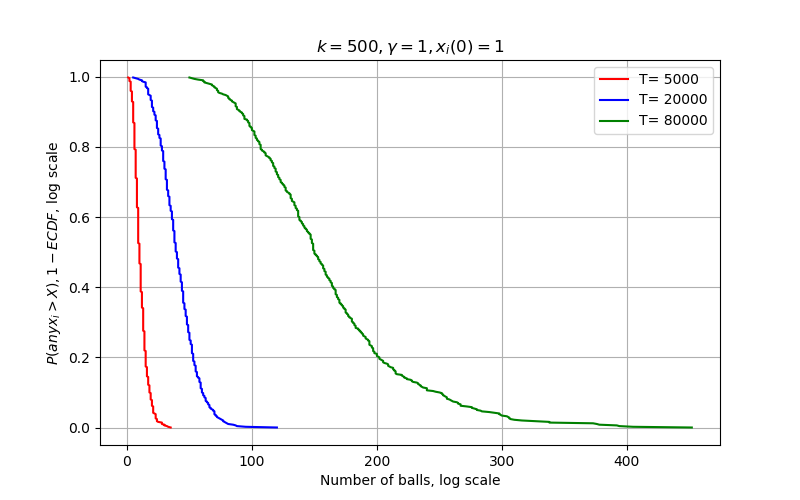

In [108]:
plt.figure(figsize = (8,5))
plt.plot(ecdf_XNA.x, np.ones(len(ecdf_XNA.y))-ecdf_XNA.y,ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XNB.x, np.ones(len(ecdf_XNB.y))-ecdf_XNB.y,ms = 4, color='b',label = 'T= 20000')
plt.plot(ecdf_XNC.x, np.ones(len(ecdf_XNC.y))-ecdf_XNC.y,ms = 4, color='g',label = 'T= 80000')

k = 500
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$, log scale')
plt.title(r'$k = {}, γ = 1, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls, log scale')
plt.grid(True)

<IPython.core.display.Javascript object>


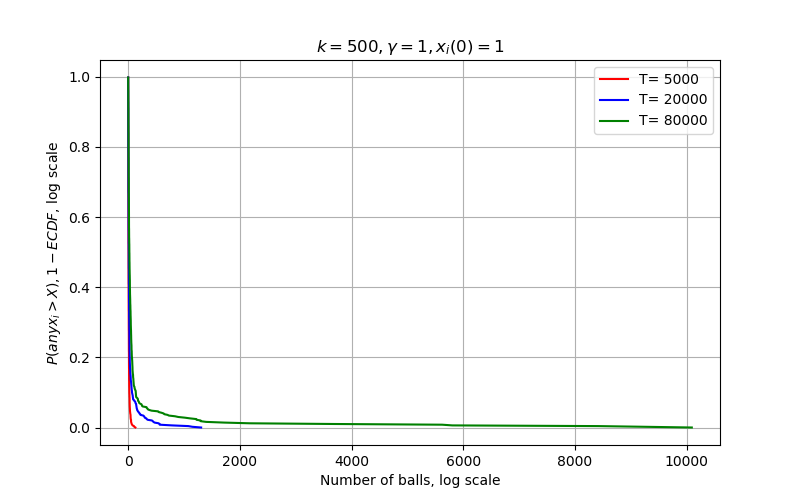

In [112]:
plt.figure(figsize = (8,5))
plt.plot(ecdf_XNA.x, np.ones(len(ecdf_XNA.y))-ecdf_XNA.y,ms = 4, color='r',label = 'T= 5000')
plt.plot(ecdf_XNB.x, np.ones(len(ecdf_XNB.y))-ecdf_XNB.y,ms = 4, color='b',label = 'T= 20000')
plt.plot(ecdf_XNC.x, np.ones(len(ecdf_XNC.y))-ecdf_XNC.y,ms = 4, color='g',label = 'T= 80000')

k = 500
plt.legend()
plt.ylabel(r'$P(any x_i > X), 1-ECDF$, log scale')
plt.title(r'$k = {}, γ = 1, x_i(0) = 1$'.format(k))
plt.xlabel('Number of balls, log scale')
plt.grid(True)